# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Dependencies
import requests
import json
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from pprint import pprint
from scipy.stats import linregress

#Import API key
from api_keys import weather_api_key

## Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File(CSV)
output_data_file ="output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [33]:
#List for holding lat_lngs and cities
lat_lngs =[]
cities =[]

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high =90.000, size =1500)
lngs=np.random.uniform(low=-180.000, high =180.000, size =1500)
lat_lngs = zip(lats, lngs)

#Identify the nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm the sufficient count
len(cities)


622

In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
weather_response = requests.get(query_url).json()
weather_response

{'coord': {'lon': 42.7678, 'lat': 51.3223},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 32.76,
  'feels_like': 22.1,
  'temp_min': 32.76,
  'temp_max': 32.76,
  'pressure': 1002,
  'humidity': 98,
  'sea_level': 1002,
  'grnd_level': 983},
 'visibility': 24,
 'wind': {'speed': 16.31, 'deg': 195, 'gust': 28.99},
 'snow': {'1h': 0.28},
 'clouds': {'all': 100},
 'dt': 1643609267,
 'sys': {'type': 2,
  'id': 2021293,
  'country': 'RU',
  'sunrise': 1643604515,
  'sunset': 1643637356},
 'timezone': 10800,
 'id': 553766,
 'name': 'Kamenka',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

In [38]:
#create lists for each variable to make data frame
city_list = []
country = []
date =[]
lat =[]
lng =[]
max_temp =[]
wind_speed = []
cloudiness =[]
humidity =[]

#Counter
record = 0
set_count = 1

#Print the statement
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

#Create "for loop" using 'try' and 'except' to append data in the appropriate list and to skip cities with no records
for i, city in enumerate(cities):
    record=record+1
    if (i%50 ==0 and i>=50):
        set_count+=1
        record = 0
    try:
        #response = requests.get(query_url).json()
        response = requests.get(query_url + city.replace(" ","%20")).json()
        city_list.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record} of Set {set_count} | {city}")
    except:
        print("City not found. Skip....")
              
print("------------------------------\nData Retrieval Complete\n------------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ouango
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | balkanabat
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | lander
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | taft
City not found. Skip....
Processing Record 13 of Set 1 | mackenzie
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | atlantic beach
Processing Record 16 of Set 1 | xining
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | port lincoln
City not found. Skip....
Processing Record 20 of Set 1 | constitucion
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | castro
Processing Record 24 of Set 1 | c

Processing Record 5 of Set 5 | yerbogachen
Processing Record 6 of Set 5 | eydhafushi
Processing Record 7 of Set 5 | menziken
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | victor harbor
Processing Record 10 of Set 5 | georgetown
Processing Record 11 of Set 5 | upernavik
Processing Record 12 of Set 5 | ilam
Processing Record 13 of Set 5 | bulgan
Processing Record 14 of Set 5 | provideniya
Processing Record 15 of Set 5 | ilheus
Processing Record 16 of Set 5 | yenagoa
Processing Record 17 of Set 5 | podor
Processing Record 18 of Set 5 | aykhal
Processing Record 19 of Set 5 | wilmington
Processing Record 20 of Set 5 | uzyn
Processing Record 21 of Set 5 | verkhnyaya inta
Processing Record 22 of Set 5 | praia da vitoria
Processing Record 23 of Set 5 | rio grande
Processing Record 24 of Set 5 | rundu
Processing Record 25 of Set 5 | cidreira
Processing Record 26 of Set 5 | caohai
City not found. Skip....
Processing Record 28 of Set 5 | ribeira grande
Processing Record 

Processing Record 14 of Set 9 | nosy varika
Processing Record 15 of Set 9 | skjervoy
Processing Record 16 of Set 9 | alofi
Processing Record 17 of Set 9 | ossora
Processing Record 18 of Set 9 | uthal
Processing Record 19 of Set 9 | oranjemund
City not found. Skip....
Processing Record 21 of Set 9 | tucurui
Processing Record 22 of Set 9 | roma
Processing Record 23 of Set 9 | tangshan
Processing Record 24 of Set 9 | maraba
City not found. Skip....
Processing Record 26 of Set 9 | vestmanna
City not found. Skip....
Processing Record 28 of Set 9 | hokitika
Processing Record 29 of Set 9 | rio gallegos
Processing Record 30 of Set 9 | villazon
Processing Record 31 of Set 9 | victoria
Processing Record 32 of Set 9 | kindu
Processing Record 33 of Set 9 | lerwick
Processing Record 34 of Set 9 | sinnamary
City not found. Skip....
Processing Record 36 of Set 9 | tuatapere
Processing Record 37 of Set 9 | dapaong
Processing Record 38 of Set 9 | puerto escondido
Processing Record 39 of Set 9 | rawson


Processing Record 16 of Set 13 | ankpa
Processing Record 17 of Set 13 | sampit
Processing Record 18 of Set 13 | novyy urengoy
Processing Record 19 of Set 13 | pangnirtung
Processing Record 20 of Set 13 | beipiao
Processing Record 21 of Set 13 | kulu
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
#Create a dictionary for Dataframe
weather= {
    "Date": date,
    "City": city_list,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Humidity(%)":humidity,
    "Cloudiness(%)":cloudiness,
    "Max Temp(F)":max_temp,
    "Wind Speed(mph)":wind_speed}

weather_df = pd.DataFrame(weather)
weather_df


,Date,City,Country,Latitude,Longitude,Humidity(%),Cloudiness(%),Max Temp(F),Wind Speed(mph)
0,1644816152,Mar del Plata,AR,-38.0023,-57.5575,77,0,59.88,5.75
1,1644816115,Ushuaia,AR,-54.8000,-68.3000,81,75,38.86,8.05
2,1644816152,Ouango,CF,4.3133,22.5552,38,77,71.53,1.50
3,1644816152,Saskylakh,RU,71.9167,114.0833,95,21,-13.95,4.23
4,1644816152,Balkanabat,TM,39.5108,54.3671,60,8,38.71,4.47
...,...,...,...,...,...,...,...,...,...
566,1644816264,Sampit,ID,-2.5333,112.9500,57,99,89.58,2.26
567,1644816264,Novy Urengoy,RU,66.0833,76.6333,99,89,-12.23,8.41
568,1644816265,Pangnirtung,CA,66.1451,-65.7125,95,80,-33.84,4.97
569,1644816265,Beipiao,CN,41.7919,120.7792,56,95,15.03,16.87


In [97]:
# Output File (CSV)
weather_df.to_csv("../output_data/weather_output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#  Get the indices of cities that have humidity over 100%.
outlier_df = weather_df.loc[weather_df["Humidity"]>100]
outlier_df.head()

,Date,City,Country,Latitude,Longitude,Humidity,Cloudiness,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

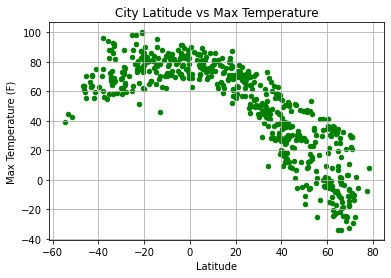

In [57]:
weather_df.plot(kind='scatter', x='Latitude',y='Max Temp(F)', color="green", title='City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

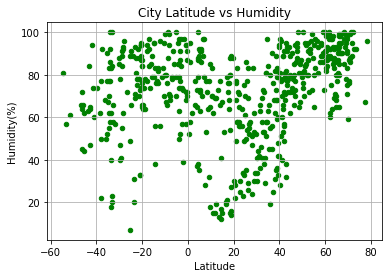

In [76]:
weather_df.plot(kind='scatter', x='Latitude',y='Humidity(%)', color="green", title='City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

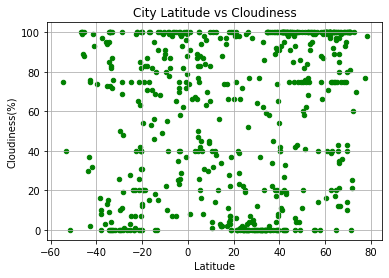

In [59]:
weather_df.plot(kind='scatter', x='Latitude',y='Cloudiness(%)', color="green", title='City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

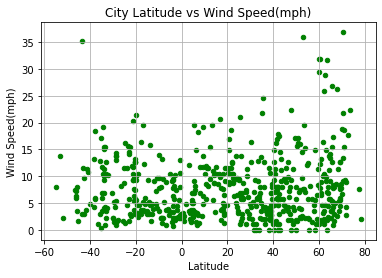

In [60]:
weather_df.plot(kind='scatter', x='Latitude',y='Wind Speed(mph)', color="green", title='City Latitude vs Wind Speed(mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(b=True)
plt.savefig("../Images/Lat_windspeed.png")
plt.show()

## Linear Regression

In [80]:
northen_df = weather_df.loc[clean_df['Latitude']>= 0]
southern_df =weather_df.loc[clean_df['Latitude']<= 0]
north_count = northen_df["City"].count()
south_count = southern_df["City"].count()

print(f"Number of cities in the Northern Hemisphere: {north_count}")
print(f"Number of cities in the Southern Hemisphere: {south_count}")

Number of cities in the Northern Hemisphere: 386
Number of cities in the Southern Hemisphere: 185


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.34x + 90.52
The correlation coefficient is-0.87


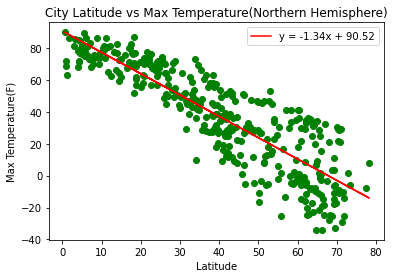

In [89]:
x_values = northen_df['Latitude']
y_values = northen_df['Max Temp(F)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is{round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Max Temperature(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

plt.savefig('../Images/Lat_MaxTemp(North).png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.37x + 82.92
The correlation coefficient is 0.44


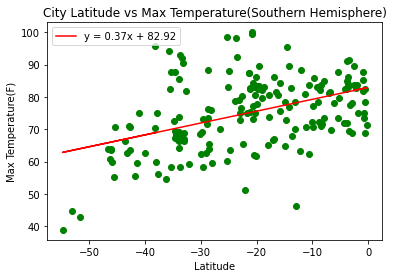

In [90]:
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp(F)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is {round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Max Temperature(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

plt.savefig('../Images/Lat_MaxTemp(South).png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.54x + 49.93
The correlation coefficient is0.49


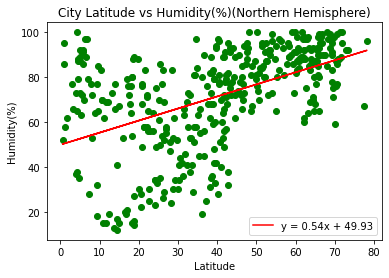

In [91]:
x_values = northen_df['Latitude']
y_values = northen_df['Humidity(%)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is{round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Humidity(%)(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.savefig('../Images/Lat_Humidity(North).png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.4x + 82.08
The correlation coefficient is 0.29


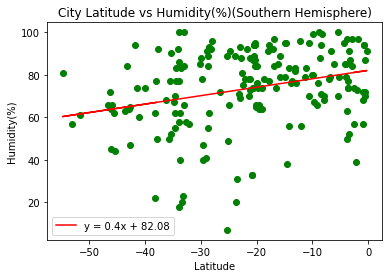

In [92]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity(%)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is {round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Humidity(%)(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.savefig('../Images/Lat_Humidity(South).png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.58x + 35.42
The correlation coefficient is0.29


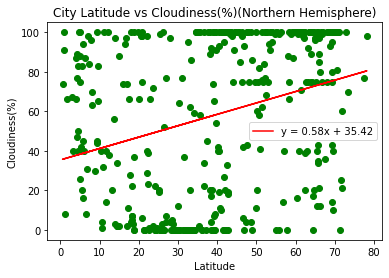

In [93]:
x_values = northen_df['Latitude']
y_values = northen_df['Cloudiness(%)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is{round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Cloudiness(%)(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

plt.savefig('../Images/Lat_Cloudiness(North).png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.5x + 66.5
The correlation coefficient is0.18


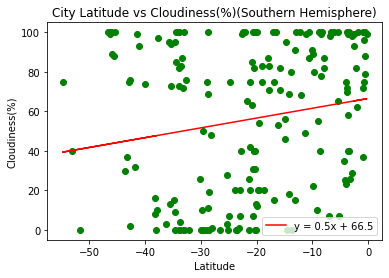

In [94]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness(%)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is{round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Cloudiness(%)(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

plt.savefig('../Images/Lat_Cloudiness(South).png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x + 6.31
The correlation coefficient is0.13


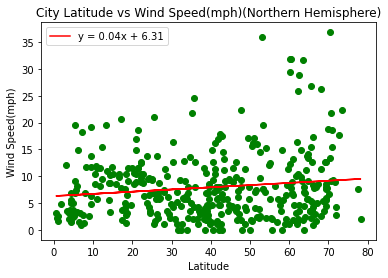

In [95]:
x_values = northen_df['Latitude']
y_values = northen_df['Wind Speed(mph)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is{round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Wind Speed(mph)(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

plt.savefig('../Images/Lat_Windspeed(North).png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.08x + 5.59
The correlation coefficient is-0.21


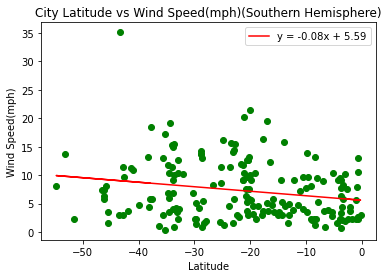

In [96]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed(mph)']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
correlation = st.pearsonr(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation coefficient is{round(correlation[0],2)}")
label =line_eq

plt.scatter(x_values,y_values,color="green")
plt.plot(x_values,regress_values,label=label, color ="red")
plt.legend(loc='best')

plt.title('City Latitude vs Wind Speed(mph)(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

plt.savefig('../Images/Lat_Windspeed(South).png')
plt.show()

## Observations based on Data

* Temperature is higher closer to the equator.Temperature in southern hemisphere are higher than in the northern hemisphere.As latitude increases humidity also increases.
* There is weak positive correlation between latitude and cloudiness
* There is a weak positive correlation between latitude and windspeed in the northern hemishpere and weak negative correlation in the southern hemisphere